In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Библиотеки загружены успешно!")

Библиотеки загружены успешно!


In [9]:
false_data = """Иногда кажется, что всё идёт не так, как хочется.
Страх неудачи мешает действовать.
Иногда маленькие ошибки кажутся огромными проблемами.
Не каждый день приносит радость.
Иногда кажется, что мир против тебя.
Бывает трудно найти мотивацию.
Ошибки повторяются, если не учиться на них.
Порой кажется, что усилия напрасны.
Не все мечты сбываются так быстро, как хочется.
Иногда сомнения сильнее желания действовать.
Порой сложно найти правильное решение.
Кажется, что успех всегда ускользает.
Неудачи случаются чаще, чем хотелось бы.
Порой всё вокруг кажется серым.
Мечты кажутся недосягаемыми.
Часто действия не приносят ожидаемого результата.
Иногда силы заканчиваются слишком рано.
Не все цели достижимы сразу.
Ошибки создают чувство разочарования.
Кажется, что прогресс остановился.
Порой жизнь ставит сложные испытания.
Иногда всё против твоих планов.
Кажется, что надежда исчезает.
Неудача ощущается тяжелее успеха.
Порой мотивация пропадает внезапно.
Ошибки кажутся непреодолимыми.
Иногда шаги к цели кажутся слишком маленькими.
Не каждый день даёт возможность исправить ошибки.
Чувство сомнения часто мешает.
Иногда кажется, что усилия бессмысленны.
Не всё идёт по плану.
Порой трудно найти поддержку.
Иногда успех других раздражает.
Кажется, что мир несправедлив.
Ошибки оставляют след на долгие дни.
Порой кажется, что силы иссякли.
Не всегда удаётся держать мотивацию.
Иногда надежда теряет силу.
Кажется, что нет выхода.
Неудачи кажутся повторяющимися.
Порой трудно верить в себя.
Иногда цели кажутся недостижимыми.
Кажется, что прогресс медленный.
Ошибки вызывают чувство вины.
Порой всё кажется бессмысленным.
Не каждый день даёт шанс на успех.
Иногда тяжело принять реальность.
Кажется, что планы рушатся.
Порой кажется, что нет контроля.
Ошибки кажутся непоправимыми.
Иногда мотивация исчезает внезапно.
Не всегда удаётся быть уверенным.
Кажется, что усилия напрасны.
Порой мир кажется чужим.
Иногда успех других раздражает.
Кажется, что нет поддержки.
Ошибки создают чувство разочарования.
Порой шаги к цели кажутся слишком медленными.
Иногда всё идёт не так.
Не каждый день приносит радость.
Кажется, что всё против тебя.
Порой трудно сделать правильное решение.
Ошибки повторяются чаще, чем хотелось бы.
Иногда цели кажутся недостижимыми.
Кажется, что прогресс остановился.
Неудачи ощущаются тяжелее успеха.
Порой кажется, что надежда исчезает.
Иногда мотивация пропадает.
Кажется, что усилия бессмысленны.
Ошибки кажутся непреодолимыми.
Порой сложно найти выход.
Не всё идёт по плану.
Иногда мир кажется несправедливым.
Кажется, что нет поддержки.
Ошибки оставляют след.
Порой силы иссякают.
Иногда надежда теряет силу.
Кажется, что выхода нет.
Неудачи повторяются.
Порой трудно верить в себя.
Иногда шаги к цели кажутся слишком маленькими.
Кажется, что прогресс медленный.
Ошибки вызывают чувство вины.
Порой всё кажется бессмысленным.
Не каждый день даёт шанс на успех.
Иногда тяжело принять реальность.
Кажется, что планы рушатся.
Порой кажется, что нет контроля.
Ошибки кажутся непоправимыми.
Иногда мотивация исчезает внезапно.
Не всегда удаётся быть уверенным.
Кажется, что усилия напрасны.
Порой мир кажется чужим.
Иногда успех других раздражает.
Кажется, что нет поддержки.
Ошибки создают чувство разочарования.
Порой шаги к цели кажутся слишком медленными.
Иногда всё идёт не так.
Не каждый день приносит радость.
Кажется, что всё против тебя.
Порой трудно сделать правильное решение.
Ошибки повторяются чаще, чем хотелось бы.
Иногда цели кажутся недостижимыми.
Кажется, что прогресс остановился.
Неудачи ощущаются тяжелее успеха.
Порой кажется, что надежда исчезает.
Иногда мотивация пропадает.
Кажется, что усилия бессмысленны.
Ошибки кажутся непреодолимыми.
Порой сложно найти выход.
Не всё идёт по плану.
Иногда мир кажется несправедливым.
Кажется, что нет поддержки.
Ошибки оставляют след.
Порой силы иссякают.
Иногда кажется, что успех недостижим.
Неудачи заставляют сомневаться в себе.
Порой трудно найти смысл в происходящем.
Кажется, что день потерян впустую.
Иногда цели кажутся слишком далекими.
Ошибки повторяются снова и снова.
Порой усилия не приводят к результату.
Кажется, что нет поддержки рядом.
Иногда мотивация тает с каждым часом.
Неудачи давят на мораль и силы.
Порой сомнения сильнее решимости.
Кажется, что мир против тебя.
Иногда надежды обманывают.
Ошибки кажутся непреодолимыми преградами.
Порой всё вокруг кажется серым и пустым.
Кажется, что силы на исходе.
"""

true_data = """Каждый день приносит шанс начать всё сначала и стать лучше.
Ты сильнее, чем предполагаешь, и смелее, чем кажешься.
Мир улыбается тем, кто улыбается ему первым.
Даже маленькие шаги приводят к большим переменам.
Твоя вера в себя открывает двери, которых раньше не было.
Каждый день — новая возможность расти и сиять.
Ты способен на большее, чем думаешь.
Добрые мысли притягивают добрые события.
Маленькие победы ведут к большим достижениям.
Улыбка делает мир светлее.
Сила внутри тебя больше любых трудностей.
Сегодня идеальный день для новых начинаний.
Вера в себя творит чудеса.
Каждый шаг вперед — это шаг к мечте.
Ты создаешь свою реальность своими мыслями.
Позитивные действия приносят позитивные результаты.
Доверяй себе и своим решениям.
Смелость начинается с маленьких поступков.
Каждый день наполнен новыми возможностями.
Благодарность открывает сердца и двери.
Ты светишься ярче, когда веришь в себя.
Счастье начинается с выбора быть счастливым.
Ты можешь больше, чем представляешь.
Мир поддерживает тех, кто действует с любовью.
Маленькие шаги каждый день строят великое завтра.
Каждый момент — шанс изменить свою жизнь.
Ты заслуживаешь счастья и радости.
Твоя доброта возвращается к тебе умноженной.
Каждое усилие приближает к мечте.
Смелость проявляется в каждом действии.
Сегодня — день новых побед и открытий.
Ты способен вдохновлять других своим примером.
Любовь и свет внутри тебя делают мир ярче.
Ты ценен и уникален.
Каждый день — возможность учиться и расти.
Твоя улыбка способна изменить чей-то день.
Ты сильнее любых сомнений.
Позитивные мысли создают позитивные результаты.
Каждый шаг вперед важен.
Ты можешь преодолеть любые преграды.
Сегодня — день для новых свершений.
Твоя энергия притягивает возможности.
Счастье приходит к тем, кто его ищет.
Ты создаешь чудеса своим упорством.
Мир открыт для твоих талантов.
Каждый день — шанс быть лучше, чем вчера.
Ты способен на великие дела.
Добро, которое ты отдаешь, возвращается.
Маленькие победы строят большие достижения.
Улыбка делает мир теплее.
Сила внутри тебя безгранична.
Сегодня твой день для успеха.
Ты творец своей реальности.
Вера в себя открывает новые пути.
Каждое действие приближает к мечте.
Ты вдохновляешь своим примером.
Смелость — это шаг вперед несмотря на страх.
Каждый день наполнен возможностями.
Благодарность делает жизнь светлее.
Ты сияешь, когда веришь в себя.
Счастье — выбор, который ты делаешь каждый день.
Ты способен на невероятные достижения.
Мир благоволит тем, кто действует с любовью.
Каждый маленький шаг важен.
Сегодня день для великих начинаний.
Ты заслуживаешь всего лучшего.
Твоя энергия привлекает хорошие события.
Мир улыбается твоей уверенности.
Каждое утро — шанс начать заново.
Ты сильнее своих сомнений.
Позитивные мысли создают позитивные действия.
Маленькие победы ведут к большим успехам.
Ты способен на большее, чем думаешь.
Сегодня идеальный день для свершений.
Твоя доброта делает мир лучше.
Смелость проявляется в каждом твоем шаге.
Каждый день — новая возможность.
Ты создаешь чудеса своими поступками.
Любовь и свет внутри тебя делают мир ярче.
Ты уникален и ценен.
Каждое мгновение — шанс быть лучше.
Твоя улыбка способна изменить мир.
Ты сильнее любых трудностей.
Позитивные действия создают позитивные результаты.
Каждый шаг вперед — это шаг к мечте.
Ты можешь преодолеть все преграды.
Сегодня день новых открытий.
Твоя энергия притягивает успех.
Счастье приходит к тем, кто его ищет.
Ты творишь чудеса своим упорством.
Мир открыт для твоих талантов.
Каждый день — шанс стать лучше.
Ты способен на великие дела.
Добро, которое отдаешь, возвращается.
Маленькие победы ведут к большим достижениям.
Улыбка делает мир светлее.
Сила внутри тебя безгранична.
Сегодня день для новых побед.
Ты творец своей реальности.
Вера в себя открывает новые возможности.
Каждое действие приближает к цели.
Ты вдохновляешь окружающих.
Смелость — это действовать несмотря на страх.
Каждый день полон шансов.
Благодарность делает жизнь радостнее.
Ты сияешь, когда веришь в себя.
Счастье — это выбор каждый день.
Ты способен на невероятные достижения.
Мир поддерживает тех, кто действует с любовью.
Каждый маленький шаг важен.
Сегодня день для новых свершений.
Ты заслуживаешь всего лучшего.
"""

with open('train_data_true.txt', 'w', encoding='utf-8') as f:
    f.write(true_text_content.strip())

with open('train_data_false.txt', 'w', encoding='utf-8') as f:
    f.write(false_text_content.strip())

print("Everything is fine with files!")

Everything is fine with files!


In [11]:

def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        # Читаем строки, убираем пустые
        lines = [line.strip() for line in f.readlines() if line.strip()]
    return lines

texts_true = load_data('train_data_true.txt')
texts_false = load_data('train_data_false.txt')

texts = texts_true + texts_false
count_true = len(texts_true)
count_false = len(texts_false)
total_lines = len(texts)

print(f"Позитивных записей: {count_true}")
print(f"Негативных записей: {count_false}")
print(f"ВСЕГО строк: {total_lines}")

# Токенизация
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(texts)

# Преобразование в цифры
max_text_len = 10
data = tokenizer.texts_to_sequences(texts)
data_pad = pad_sequences(data, maxlen=max_text_len)

# Подготовка X и Y
X = data_pad
Y = np.array([[1, 0]] * count_true + [[0, 1]] * count_false)

# Перемешиваем данные
indices = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
X = X[indices]
Y = Y[indices]

print("Данные успешно подготовлены!")

Позитивных записей: 233
Негативных записей: 180
ВСЕГО строк: 413
Данные успешно подготовлены!


In [13]:
model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length=max_text_len))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))
model.summary() # Покажет структуру сети

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Обучаю модели...")
history = model.fit(X, Y, batch_size=32, epochs=40, verbose=1)
print("Закончено!")

Обучаю модели...
Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5579 - loss: 0.6911
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5862 - loss: 0.6807
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5664 - loss: 0.6709
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5605 - loss: 0.6570
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5759 - loss: 0.6270
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6897 - loss: 0.5734
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8259 - loss: 0.5067
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9648 - loss: 0.3470
Epoch 9/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9927 - loss: 0.1771
Epoch 10/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9930 - loss: 0.0905
Epoch 11/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9943 - loss: 0.0650
Epoch 12/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

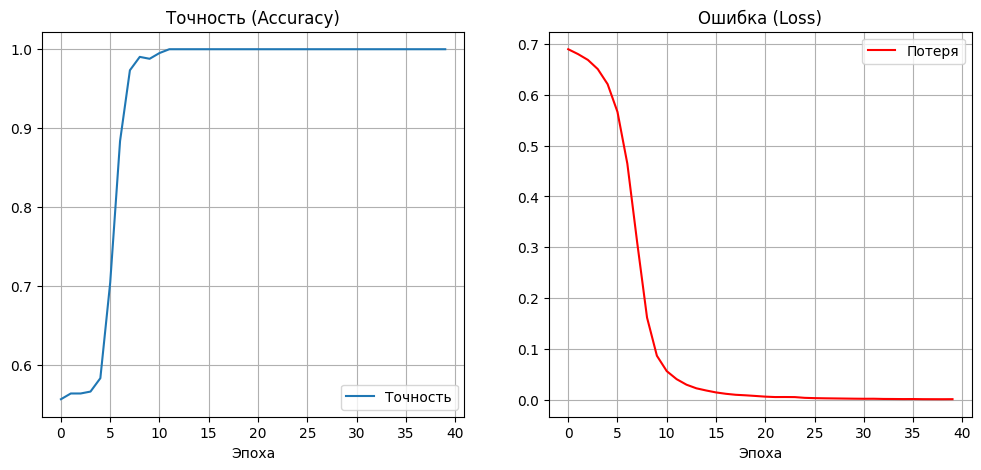

In [16]:
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность')
plt.title('Точность (Accuracy)')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True)

# График ошибки
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потеря', color='red')
plt.title('Ошибка (Loss)')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True)

plt.show()

In [19]:
model.fit(X, Y, epochs=20, batch_size=16, validation_split=0.1)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.5919e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.7397e-04 - val_accuracy: 1.0000 - val_loss: 9.1915e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 5.9367e-04 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 9.7199e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 5.9900e-04 - val_

In [23]:
def predict_mood(text):
    t = text.lower()
    data = tokenizer.texts_to_sequences([t])
    data_pad = pad_sequences(data, maxlen=max_text_len)

    res = model.predict(data_pad, verbose=0)
    prediction = np.argmax(res)

    mood = "Позитив" if prediction ==  0 else "Негатив"
    print(f"Фраза: '{text}' -> {mood}")

predict_mood("Я не верю в себя и в свое будущее.")
predict_mood("У тебя в будущем все получится.")
predict_mood("Ты сильнее всех.")
predict_mood("Меня все ненавидят.")
predict_mood("Как будто у меня ничего не получится.")

Фраза: 'Я не верю в себя и в свое будущее.' -> Негатив
Фраза: 'У тебя в будущем все получится.' -> Позитив
Фраза: 'Ты сильнее всех.' -> Позитив
Фраза: 'Меня все ненавидят.' -> Негатив
Фраза: 'Как будто у меня ничего не получится.' -> Негатив
